CNN model for classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📦 Training on MNIST dataset...

Epoch 1/10
1875/1875 - 62s - 33ms/step - accuracy: 0.9577 - loss: 0.1387 - val_accuracy: 0.9849 - val_loss: 0.0462
Epoch 2/10
1875/1875 - 81s - 43ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9890 - val_loss: 0.0340
Epoch 3/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9869 - val_loss: 0.0369
Epoch 4/10
1875/1875 - 83s - 44ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9903 - val_loss: 0.0297
Epoch 5/10
1875/1875 - 81s - 43ms/step - accuracy: 0.9940 - loss: 0.0170 - val_accuracy: 0.9921 - val_loss: 0.0277
Epoch 6/10
1875/1875 - 86s - 46ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9905 - val_loss: 0.0265
Epoch 7/10
1875/1875 - 78s - 42ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 8/10
1875/1875 - 83s - 44ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9903 - val_loss: 0.0319
Epoch 9/10
1875/1875 - 91s - 49ms/step - accura

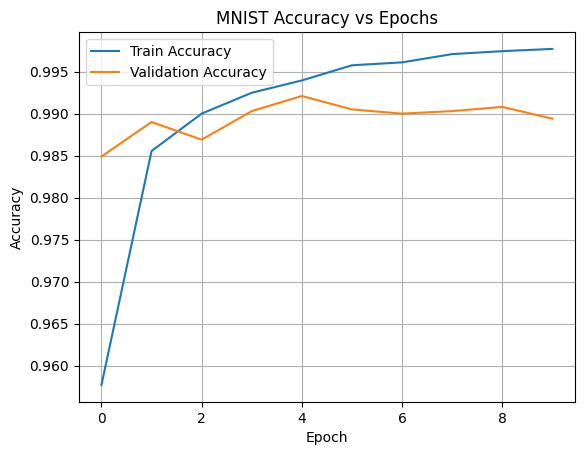

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📦 Training on CIFAR10 dataset...

Epoch 1/10
1563/1563 - 87s - 56ms/step - accuracy: 0.4902 - loss: 1.4253 - val_accuracy: 0.5510 - val_loss: 1.2842
Epoch 2/10
1563/1563 - 70s - 45ms/step - accuracy: 0.6202 - loss: 1.0913 - val_accuracy: 0.6373 - val_loss: 1.0328
Epoch 3/10
1563/1563 - 82s - 52ms/step - accuracy: 0.6647 - loss: 0.9614 - val_accuracy: 0.6690 - val_loss: 0.9625
Epoch 4/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6981 - loss: 0.8734 - val_accuracy: 0.6901 - val_loss: 0.9038
Epoch 5/10
1563/1563 - 71s - 45ms/step - accuracy: 0.7216 - loss: 0.7961 - val_accuracy: 0.6896 - val_loss: 0.9077
Epoch 6/10
1563/1563 - 81s - 52ms/step - accuracy: 0.7431 - loss: 0.7396 - val_accuracy: 0.6916 - val_loss: 0.9084
Epoch 7/10
1563/1563 - 81s - 52ms/step - accuracy: 0.7583 - loss: 0.6887 - val_accuracy: 0.7057 - val_loss: 0.8926
Epoch 8/10
1563/1563 - 70s - 45ms/step - accuracy: 0.7756 - loss: 0.6432 - val_accuracy: 0.7020 - val_loss: 0.9093
Epoch 9/10
1563/1563 - 81s - 52ms/step - accu

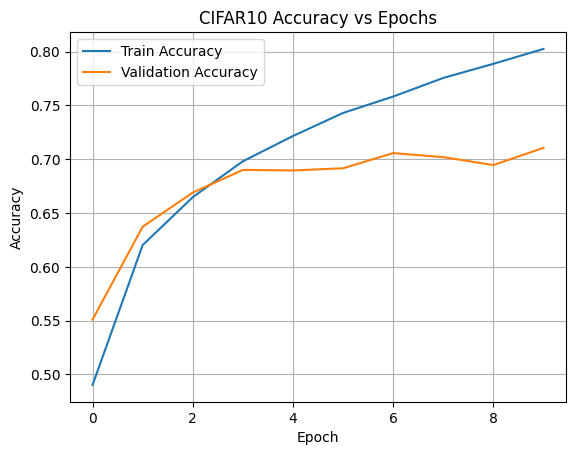


 Training Time Comparison:
MNIST Training Time   : 807.61 seconds
CIFAR-10 Training Time: 803.44 seconds


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

def load_and_preprocess_data(dataset_name):
    if dataset_name == 'mnist':
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        x_train = x_train[..., tf.newaxis] / 255.0
        x_test = x_test[..., tf.newaxis] / 255.0
        input_shape = (28, 28, 1)
        num_classes = 10
    elif dataset_name == 'cifar10':
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        x_train = x_train / 255.0
        x_test = x_test / 255.0
        y_train = y_train.flatten()
        y_test = y_test.flatten()
        input_shape = (32, 32, 3)
        num_classes = 10
    return x_train, y_train, x_test, y_test, input_shape, num_classes

def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def train_and_save(dataset_name):
    x_train, y_train, x_test, y_test, input_shape, num_classes = load_and_preprocess_data(dataset_name)

    model = build_cnn_model(input_shape, num_classes)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n📦 Training on {dataset_name.upper()} dataset...\n")

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10,
                        validation_data=(x_test, y_test),
                        verbose=2)
    end_time = time.time()
    training_time = end_time - start_time

    # Save model weights
    # Save model weights (filename must end in `.weights.h5`)
    weight_file = f'{dataset_name}.weights.h5'
    model.save_weights(weight_file)
    print(f" Model weights saved to: {weight_file}")


    # Export metrics to CSV
    metrics_df = pd.DataFrame(history.history)
    csv_file = f'{dataset_name}_training_log.csv'
    metrics_df.to_csv(csv_file, index=False)
    print(f" Training history saved to: {csv_file}")

    # Plot accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{dataset_name.upper()} Accuracy vs Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return training_time

# Make output directory
os.makedirs("outputs", exist_ok=True)
os.chdir("outputs")

# Run for MNIST and CIFAR-10
mnist_time = train_and_save('mnist')
cifar_time = train_and_save('cifar10')

# Compare training time
print("\n Training Time Comparison:")
print(f"MNIST Training Time   : {mnist_time:.2f} seconds")
print(f"CIFAR-10 Training Time: {cifar_time:.2f} seconds")
